In [1]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor

#df_13 = pd.read_csv('13_clean.csv')
#df_13.head()

years = ['85', '87', '89', '91', '93', '95', '97', '99', '01', '03', '05', '07', '09', '11', '13']
years_num = [1985, 1987, 1989, 1991, 1993, 1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013 ]

df_allYears = pd.DataFrame()
for year, i in zip(years, years_num):
    df = pd.read_csv(year + '_clean.csv')
    df['YEAR'] = i
    df_allYears = df_allYears.append(df)

In [2]:
df_allYears.head()

,CONTROL,AGE,BEDRMS,FMTBUILT,BURDEN,COSTMED,COSTMEDRELAMIPCT,FMTCOSTMEDRELAMICAT,FMR,FMTASSISTED,...,FMTMETRO,FMTZADEQ,ABL50,ABL80,ABLMED,GL50,GL80,GLMED,L50,YEAR
0,'100006110249',39.0,3.0,'1980-1989',0.317333,476.000000,81.283131,'4 60 - 80% AMI',380.0,'0 Not Assisted',...,'-5','1 Adequate',11957.724480,19127.189120,23424.29440,11497.812,18391.528,22523.360,12027.0,1985
1,'100007130148',40.0,2.0,'1980-1989',0.323662,383.000000,60.305059,'4 60 - 80% AMI',349.0,'0 Not Assisted',...,'Central City','1 Adequate',12700.460000,20322.648000,25404.17040,12700.460,20322.648,28226.856,13285.0,1985
2,'100014110140',19.0,2.0,'1980-1989',0.318000,371.000000,73.207945,'4 60 - 80% AMI',289.0,'0 Not Assisted',...,'-5','1 Adequate',10346.310000,16550.869500,20271.02400,9196.720,14711.884,22523.360,9620.0,1985
3,'100014350142',28.0,3.0,'1980-1989',0.277371,1496.349020,178.071751,'7 120% AMI +',596.0,'0 Not Assisted',...,'-5','1 Adequate',17066.681956,25737.559467,33612.27168,14769.244,22272.888,32319.492,15449.0,1985
4,'100015770147',30.0,3.0,'1980-1989',0.205429,726.679228,97.552691,'5 80 - 100% AMI',453.0,'0 Not Assisted',...,'-5','1 Adequate',14877.558800,23828.204400,29796.37856,11444.276,18329.388,28650.364,11971.0,1985


In [3]:
df_allYears.columns

Index(['CONTROL', 'AGE', 'BEDRMS', 'FMTBUILT', 'BURDEN', 'COSTMED',
       'COSTMEDRELAMIPCT', 'FMTCOSTMEDRELAMICAT', 'FMR', 'FMTASSISTED',
       'FMTOWNRENT', 'FMTSTATUS', 'FMTSTRUCTURETYPE', 'FMTINCRELAMICAT',
       'INCRELAMIPCT', 'IPOV', 'LMED', 'NUNITS', 'OTHERCOST', 'PER', 'ROOMS',
       'TOTSAL', 'UTILITY', 'VALUE', 'ZINC2', 'ZSMHC', 'REGION', 'FMTMETRO',
       'FMTZADEQ', 'ABL50', 'ABL80', 'ABLMED', 'GL50', 'GL80', 'GLMED', 'L50',
       'YEAR'],
      dtype='object')

In [4]:
#choose columns that are independent, e.g. COSTMED, COSTMEDRELAMITPCT, FMTCOSTMEDRELAMIPCT 
#show the same data in different format; ditto for FMTINCRELAMICAT and INCRELAMIPCT
# drop CONTROL as well
cols = ['CONTROL', 'COSTMED', 'FMTCOSTMEDRELAMICAT', 'FMTINCRELAMICAT']
df_toKeep = df_allYears.drop(cols, axis=1)
print(df_toKeep.shape)

(771870, 33)


In [5]:
#removing columns related to cost since these are related to target variable ZSMHC (monthly housing cost)
cols = ['COSTMEDRELAMIPCT', 'BURDEN', 'OTHERCOST', 'UTILITY']
df_toKeep = df_toKeep.drop(cols, axis=1)
print(df_toKeep.shape)

(771870, 29)


In [6]:
cols = df_toKeep.columns
for col in cols:
    n_rows = df_toKeep.loc[df_toKeep[col].isna()].shape
    if(n_rows[0] != 0):
        print(col)        
        print(n_rows)

BEDRMS
(2, 29)
FMR
(94, 29)
INCRELAMIPCT
(89, 29)
LMED
(91, 29)
VALUE
(272317, 29)
ZSMHC
(12678, 29)
ABL50
(91, 29)
ABL80
(91, 29)
ABLMED
(91, 29)
GL50
(91, 29)
GL80
(91, 29)
GLMED
(91, 29)
L50
(91, 29)


In [7]:
df_toKeep = df_toKeep.dropna()
print(df_toKeep.shape)

(486785, 29)


In [8]:
cols = ['FMTBUILT', 'FMTASSISTED', 'FMTOWNRENT', 'FMTSTRUCTURETYPE', 'FMTSTATUS', 'REGION', 'FMTMETRO']
for col in cols:
    print(df_toKeep[col].value_counts())
    print('\n')

'not_defined'    178698
'1960-1979'      122644
'1940-1959'       76718
'1980-1989'       45627
'1990-1999'       33965
'2000-2009'       28062
'After 2010'       1071
Name: FMTBUILT, dtype: int64


'.'                 323080
'0 Not Assisted'    163705
Name: FMTASSISTED, dtype: int64


'1 Owner'    486785
Name: FMTOWNRENT, dtype: int64


'1 Single Family'    432024
'6 Mobile Home'       29210
'2 2-4 units'         12193
'3 5-19 units'         6357
'5 50+ units'          4394
'4 20-49 units'        2607
Name: FMTSTRUCTURETYPE, dtype: int64


'-5'            323080
'1 Occupied'    163705
Name: FMTSTATUS, dtype: int64


3.0    165283
2.0    129977
4.0     99539
1.0     91986
Name: REGION, dtype: int64


'-5'              371911
'Central City'    114031
'9'                  843
Name: FMTMETRO, dtype: int64




In [9]:
#remove values of FMTMETRO set to 9;
df_toKeep = df_toKeep.loc[~df_toKeep['FMTMETRO'].str.contains('9', regex=False)]

In [10]:
#drop FMTSTATUS - earlier generated ill-defined matrix warning for ridge regression;
#values for this column is constanct for several years
df_toKeep = df_toKeep.drop('FMTSTATUS', axis=1)

#converting REGION from int type to string type
df_toKeep['REGION'] = df_toKeep['REGION'].apply(str)

#converting YEAR from int type to string type
#df_toKeep['YEAR'] = df_toKeep['YEAR'].apply(str)

#convert categorical variables to indicator variables
df_toKeep = pd.get_dummies(df_toKeep, drop_first=True)

#df_toKeep = df_toKeep.drop(['FMTBUILT_\'not_defined\'', 'FMTASSISTED_\'.\'',\
#                            'FMTSTRUCTURETYPE_\'6 Mobile Home\''], axis=1)

print(df_toKeep.columns)

Index(['AGE', 'BEDRMS', 'FMR', 'INCRELAMIPCT', 'IPOV', 'LMED', 'NUNITS', 'PER',
       'ROOMS', 'TOTSAL', 'VALUE', 'ZINC2', 'ZSMHC', 'ABL50', 'ABL80',
       'ABLMED', 'GL50', 'GL80', 'GLMED', 'L50', 'YEAR',
       'FMTBUILT_'1960-1979'', 'FMTBUILT_'1980-1989'', 'FMTBUILT_'1990-1999'',
       'FMTBUILT_'2000-2009'', 'FMTBUILT_'After 2010'',
       'FMTBUILT_'not_defined'', 'FMTASSISTED_'0 Not Assisted'',
       'FMTSTRUCTURETYPE_'2 2-4 units'', 'FMTSTRUCTURETYPE_'3 5-19 units'',
       'FMTSTRUCTURETYPE_'4 20-49 units'', 'FMTSTRUCTURETYPE_'5 50+ units'',
       'FMTSTRUCTURETYPE_'6 Mobile Home'', 'REGION_2.0', 'REGION_3.0',
       'REGION_4.0', 'FMTMETRO_'Central City'',
       'FMTZADEQ_'2 Moderately Inadequ'', 'FMTZADEQ_'3 Severely Indadequa''],
      dtype='object')


In [11]:
X = df_toKeep.drop(['ZSMHC'], axis=1).values

y = df_toKeep['ZSMHC'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_all = Ridge()

ridge_all_cv = GridSearchCV(ridge_all, param_grid, cv=5)

ridge_all_cv.fit(X_train, y_train)

print(ridge_all_cv.best_params_)
print(ridge_all_cv.best_score_)

{'alpha': 10}
0.5675213654423323


In [13]:
ridge_all_cv.cv_results_['mean_test_score']

array([0.56752126, 0.56752126, 0.56752127, 0.56752137, 0.56751916])

In [14]:
#create ridge instance using best parameter alpha = 10 
ridge_all = Ridge(alpha=10)
ridge_all.fit(X_train, y_train)
score = ridge_all.score(X_test, y_test)
print(score)

0.5671614358224469


y-intercept =  -370.0158186535707


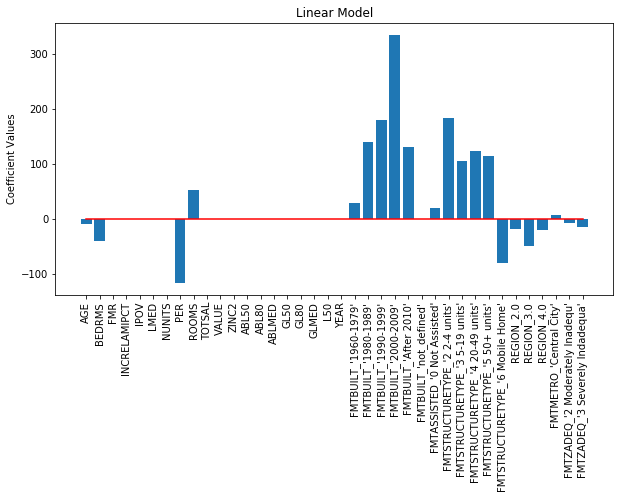

In [15]:
coeffs = ridge_all.coef_
intercept = ridge_all.intercept_
cols = df_toKeep.drop(['ZSMHC'], axis=1).columns
print('y-intercept = ', intercept)
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(coeffs)), coeffs)
plt.plot(np.arange(len(coeffs)), np.zeros(len(coeffs)), c='r')
plt.xticks(np.arange(len(coeffs)), cols, rotation=90)
plt.ylabel('Coefficient Values')
plt.title('Linear Model')
plt.show()

In [16]:
#create a linear model with data scaled to mean 0 and standard deviation 1
X_train_scaled = scale(X_train)
y_train_scaled = scale(y_train)

X_test_scaled = scale(X_test)
y_test_scaled = scale(y_test)

ridge_scaled = Ridge(alpha=10)
ridge_scaled.fit(X_train_scaled, y_train_scaled)
score_scaled = ridge_scaled.score(X_test_scaled, y_test_scaled)

print(score_scaled)

0.5671393886668258


y-intercept =  1.116051144495189e-13


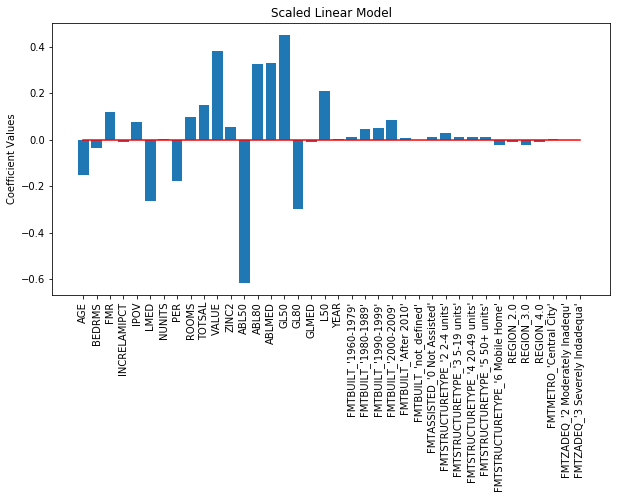

In [17]:
coeffs = ridge_scaled.coef_
intercept = ridge_scaled.intercept_
print('y-intercept = ', intercept)
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(coeffs)), coeffs)
plt.plot(np.arange(len(coeffs)), np.zeros(len(coeffs)), c='r')
plt.xticks(np.arange(len(coeffs)), cols, rotation=90)
plt.ylabel('Coefficient Values')
plt.title('Scaled Linear Model')
plt.show()

In [18]:
y_predicted = ridge_scaled.predict(X_test_scaled)

In [19]:
#computer percent errors for this model; save data for later plotting
cols_list = list(cols)
year = X_test[:, cols_list.index('YEAR')]
result_0 = pd.DataFrame({'YEAR': year, 'YPREDICTED': y_predicted, 'YACTUAL': y_test_scaled})
# remove rows where actual value is 0 as percent errior is not defined in this case
result_0 = result_0.loc[result_0['YACTUAL'] != 0.0]
result_0['PERCENT_ERROR'] = (result_0['YPREDICTED']/result_0['YACTUAL']-1.0)*100

In [20]:
result_0.head()

,YEAR,YPREDICTED,YACTUAL,PERCENT_ERROR
0,2003.0,0.045122,0.459899,-90.188674
1,1987.0,-0.665090,-0.632350,5.177661
2,2011.0,0.376353,-0.405110,-192.901328
3,2007.0,0.288544,1.185564,-75.661841
4,1997.0,-0.304518,-0.476927,-36.149943


In [21]:
coef_list = list(ridge_scaled.coef_)

coef_cols_tuples = [(col, coef) for col, coef in zip(cols_list, coef_list)]

coef_cols_tuples = sorted(coef_cols_tuples, key = lambda x: x[1], reverse=True)

#print top 10 coefficients
for pair in coef_cols_tuples[0:10]:
    print(pair)

('GL50', 0.4484426439553155)
('VALUE', 0.3815712297439273)
('ABLMED', 0.33165723909034417)
('ABL80', 0.3275561274908075)
('L50', 0.21084036976026502)
('TOTSAL', 0.14906500137745066)
('FMR', 0.11775064842690769)
('ROOMS', 0.09817652565488)
("FMTBUILT_'2000-2009'", 0.08397423271823795)
('IPOV', 0.07569511196488105)


Listed above are the top 10 coefficients for the scaled linear model. I could try a new linear model that only includes these features. Instead I will proceed with a random forest regressor model which should capture non-linearities.

In [22]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
score_rf = rf.score(X_test, y_test)
print('random forest score = ', score_rf)

/home/roberto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


random forest score =  0.5740414348730563


In [23]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(rf, X_train, y_train, cv=3)
cv_results['test_score']

array([0.56952753, 0.56426351, 0.56282026])

In [24]:
# fit data to random forest model again; get feature importance
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [25]:
importances = list(rf.feature_importances_)

feature_importances = [(col, importance) for col, importance in zip(cols_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print top 10 features
for pair in feature_importances[0:10]:
    print(pair)

('VALUE', 0.4689421238469665)
('AGE', 0.10329914986432302)
('ZINC2', 0.052151754158370214)
('TOTSAL', 0.0374351532796402)
('INCRELAMIPCT', 0.0328767155551168)
('FMR', 0.03163468369983343)
('IPOV', 0.029081689949054985)
('GL80', 0.027461384493549824)
('ABL80', 0.025500338284109934)
('GL50', 0.02173319953892814)


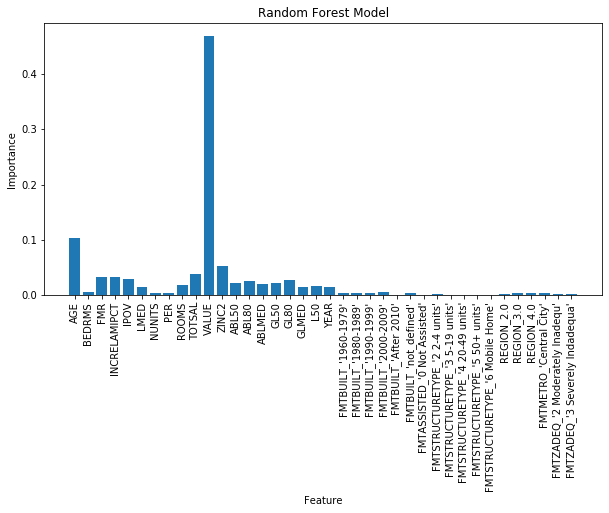

In [26]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(cols_list)), importances)
plt.xticks(np.arange(len(cols_list)), cols, rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Random Forest Model')
plt.show()

In [27]:
#create a random forest model with the top 5 most important features: VALUE, AGE, ZINC2, TOTSAL, INCRELAMIPCT

important_indices = [cols_list.index('VALUE'), cols_list.index('AGE'), cols_list.index('ZINC2'),\
                     cols_list.index('TOTSAL'), cols_list.index('INCRELAMIPCT')]
X_train_important = X_train[:, important_indices]
X_test_important  = X_test[:, important_indices]

rf_important = RandomForestRegressor(random_state=42, n_jobs=-1)

rf_important.fit(X_train_important, y_train)
score_rf_important = rf_important.score(X_test_important, y_test)
print('random forest score = ', score_rf_important)

/home/roberto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


random forest score =  0.5193089489694485


In [28]:
#cross validate 5-feature model
#using 3-fold crossvalidation due to memory constraints
cv_results = cross_validate(rf_important, X_train_important, y_train, cv=3)
cv_results['test_score']

array([0.53203997, 0.52117428, 0.51420579])

In [29]:
rf_important.fit(X_train_important, y_train)
y_predicted = rf_important.predict(X_test_important)

In [30]:
year = X_test[:, cols_list.index('YEAR')]
result = pd.DataFrame({'YEAR': year, 'YPREDICTED': y_predicted, 'YACTUAL': y_test})
# remove rows where actual value is 0 as percent errior is not defined in this case
result = result.loc[result['YACTUAL'] != 0.0]
result['PERCENT_ERROR'] = (result['YPREDICTED']/result['YACTUAL']-1.0)*100

In [31]:
years = [1985, 1987, 1989, 1991, 1993, 1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013]
yactual_avg = {}
for year in years:
    temp = result.loc[result['YEAR'] == year, 'YACTUAL'].sum()
    n = (result['YEAR'] == year).sum()
    temp = temp/n
    yactual_avg[year] = temp

result['YPREDICTED_0'] = result['YEAR']

result.replace({'YPREDICTED_0': yactual_avg})

#this column stores the percent error for a model that predicts the average of YACTUAL,regardless of feature values
#such a model would have a score of zero
result['PERCENT_ERROR_0'] = (result['YPREDICTED_0']/result['YACTUAL'] - 1.0)*100

In [32]:
print(result_0['PERCENT_ERROR'].isna().sum())
result_0.head()

0


,YEAR,YPREDICTED,YACTUAL,PERCENT_ERROR
0,2003.0,0.045122,0.459899,-90.188674
1,1987.0,-0.665090,-0.632350,5.177661
2,2011.0,0.376353,-0.405110,-192.901328
3,2007.0,0.288544,1.185564,-75.661841
4,1997.0,-0.304518,-0.476927,-36.149943


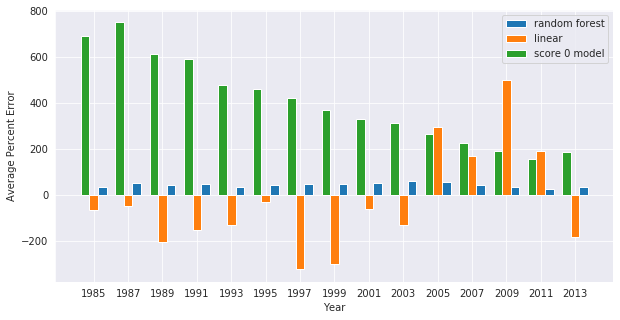

In [59]:
avgs = []
avgs0 = []
avgs_linear = []
for year in years:
    series = result.loc[result['YEAR'] == year, 'PERCENT_ERROR']
    avg = series.mean()
    avgs.append(avg)
    
    series = result.loc[result['YEAR'] == year, 'PERCENT_ERROR_0']
    avg = series.mean()
    avgs0.append(avg)
    
    series = result_0.loc[result_0['YEAR'] == year, 'PERCENT_ERROR']
    avg = series.mean()
    avgs_linear.append(avg) 
    
fig, ax = plt.subplots(figsize=(10,5))

width = 0.5
offset = 0.5

x = [year + offset for year in years]
bar1 = ax.bar(x, avgs, width, label = 'random forest')

x = [year for year in years]
bar2 = ax.bar(x, avgs_linear, width, label = 'linear')

x = [year - offset for year in years]
bar3 = ax.bar(x, avgs0, width, label = 'score 0 model')

ax.set_xticks(years)
ax.set_xticklabels(years)

ax.set_ylabel('Average Percent Error')
ax.set_xlabel('Year')

ax.legend()

plt.show()


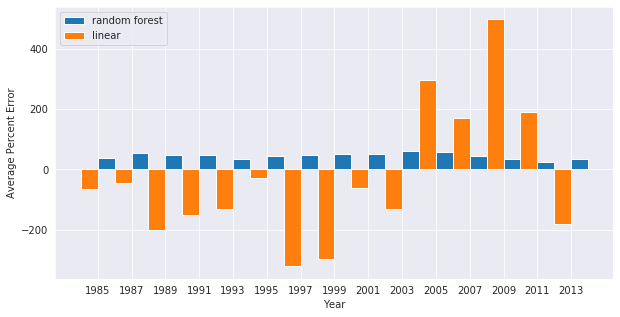

In [57]:
fig, ax = plt.subplots(figsize=(10,5))

offset = 0.5
width = 1

x = [year + offset for year in years]
bar1 = ax.bar(x, avgs, width, label = 'random forest')

x = [year - offset for year in years]
bar2 = ax.bar(x, avgs_linear, width, label = 'linear')

ax.set_xticks(years)
ax.set_xticklabels(years)

ax.set_ylabel('Average Percent Error')
ax.set_xlabel('Year')

ax.legend()

plt.show()


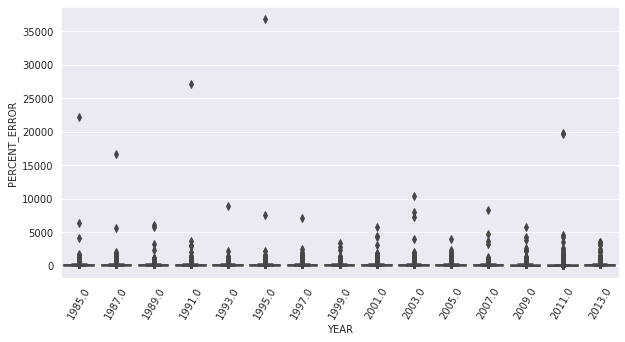

In [35]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
plt.xticks(years, years, rotation=60)
sns.boxplot(x='YEAR', y='PERCENT_ERROR', data=result)

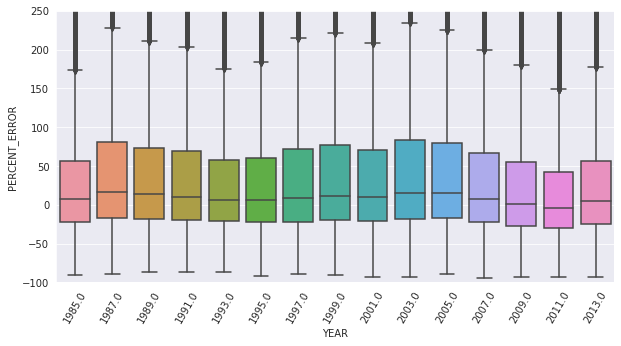

In [36]:
plt.figure(figsize=(10,5))
plt.ylim(-100, 250)
plt.xticks(years, years, rotation=60)
sns.boxplot(x='YEAR', y='PERCENT_ERROR', data=result)